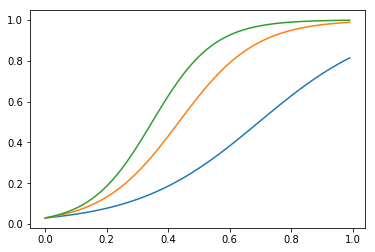

In [4]:
# リスト 9.1 SI modelでの感染者割合の時間変化
import matplotlib.pyplot as plt
from scipy import optimize, exp

x = range(100)
y = [0] * 100
x0 = 0.03
b = 5
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 8
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 10
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
plt.show()

In [6]:
# リスト 9.2 NDlibによるSIR modelでの感染者数の時間変化
!pip install -q ndlib
!pip install -q bokeh

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics as ep

g = nx.erdos_renyi_graph(1000, 0.1)
print(nx.info(g))

#model = sir.SIRModel(g)
model = ep.SIRModel(g)

import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(config)

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

from bokeh.io import output_notebook, show
output_notebook()
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)


Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 49913
Average degree:  99.8260
